In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.0)

PROJECT_ROOT_DIR = Path().absolute().parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [2]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [5]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [6]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [7]:
SMOOTH = True

# reach distance 0.01 goal_range 0.8 episode 80

100
100
100


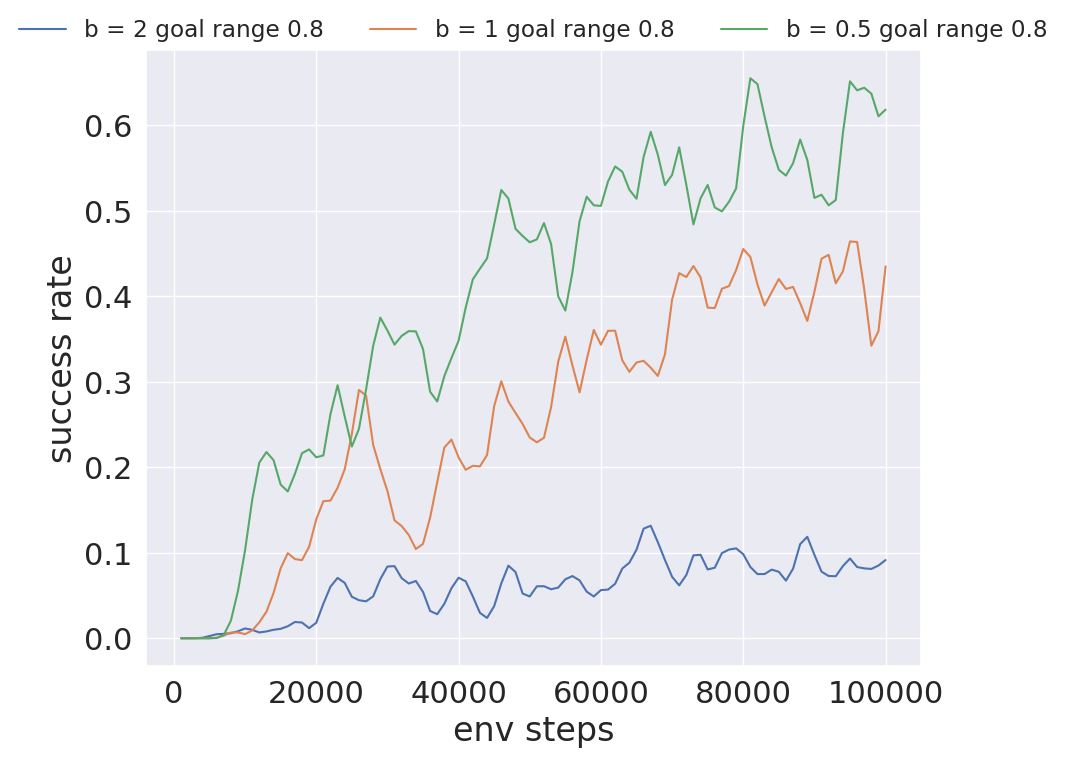

In [8]:
files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_01/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2 goal range 0.8", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))


files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_01/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1 goal range 0.8", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_01/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 0.5 goal range 0.8", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))


data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# Reach distance 0.005

## Reach One Stage distance 0.005

In [26]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_005/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2 distance 0.005", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))

100


In [27]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_005/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1 distance 0.005", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

100


In [28]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_005/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 0.5 distance 0.005", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))

100


# Two Stage reach distance 0.005

In [31]:
first_files = [
    "D2D/panda_reach_dense/distance_threshold_0_005/her/two_stage_relative_hard_b_2_b_05/sac_her_10hz_128_128_b_2_5e4steps_seed_1_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/distance_threshold_0_005/her/two_stage_relative_hard_b_2_b_05/sac_her_10hz_128_128_b_2_5e4_b_05_5e4steps_seed_1_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    # "seed 2", 
    # "seed 3", 
    # "seed 4", 
    # "seed 5"
]
df_reach_b_2_b_05 = pd.concat([load_two_stage_data("b=2 + b=0.5 distance 0.005", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=50000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_b_2_b_05))

100


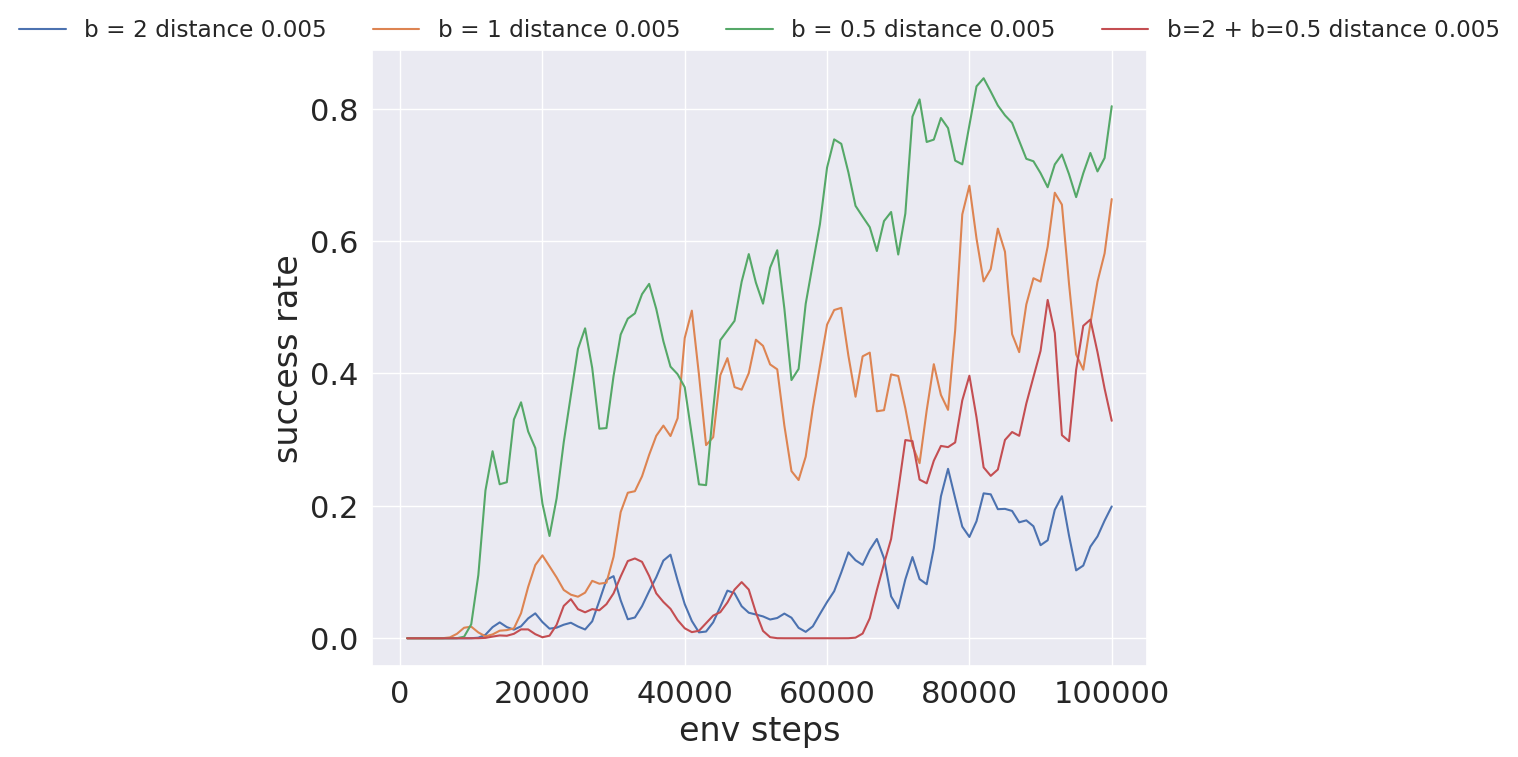

In [32]:
data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
    df_reach_b_2_b_05,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# Reach distance 0.01

## Reach One Stage distance 0.01

In [20]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_01/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))

100


In [21]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_01/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

100


In [22]:
files = [
    "D2D/panda_reach_dense/distance_threshold_0_01/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 05", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))

100


# Two Stage reach distance 0.01

In [23]:
first_files = [
    "D2D/panda_reach_dense/distance_threshold_0_01/her/two_stage_relative_hard_b_2_b_05/sac_her_10hz_128_128_b_2_5e4steps_seed_1_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/distance_threshold_0_01/her/two_stage_relative_hard_b_2_b_05/sac_her_10hz_128_128_b_2_5e4_b_05_5e4steps_seed_1_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    # "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    # "seed 2", 
    # "seed 3", 
    # "seed 4", 
    # "seed 5"
]
df_reach_b_2_b_05 = pd.concat([load_two_stage_data("b=2 + b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=50000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_b_2_b_05))

100


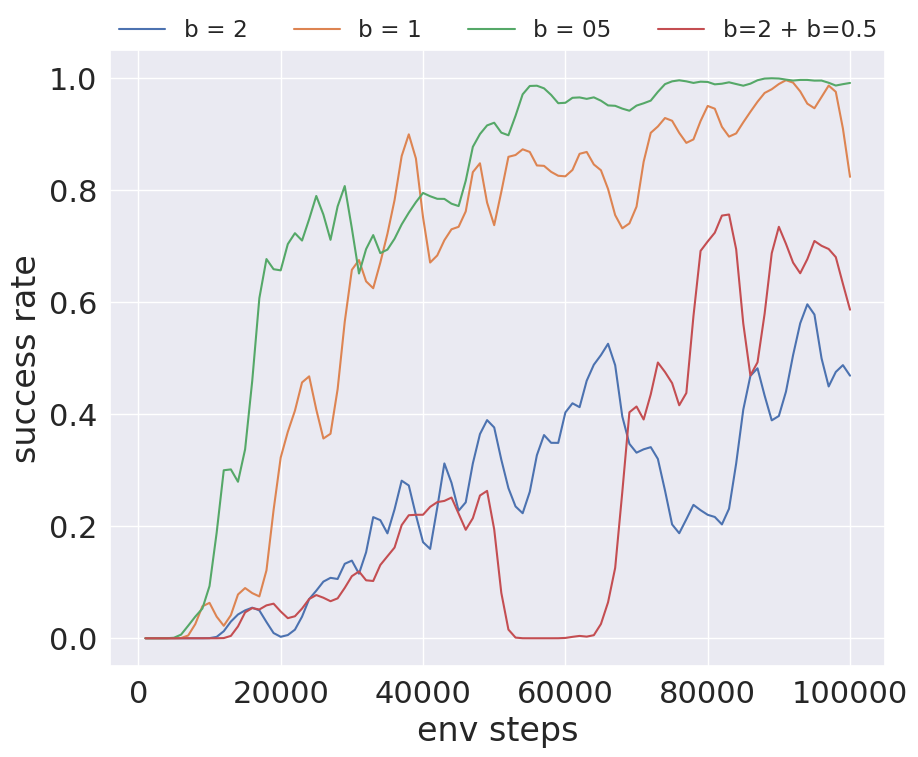

In [24]:
data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
    df_reach_b_2_b_05,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# Reach 0.005 change goal z distance_threshold_0_005

100
100
100


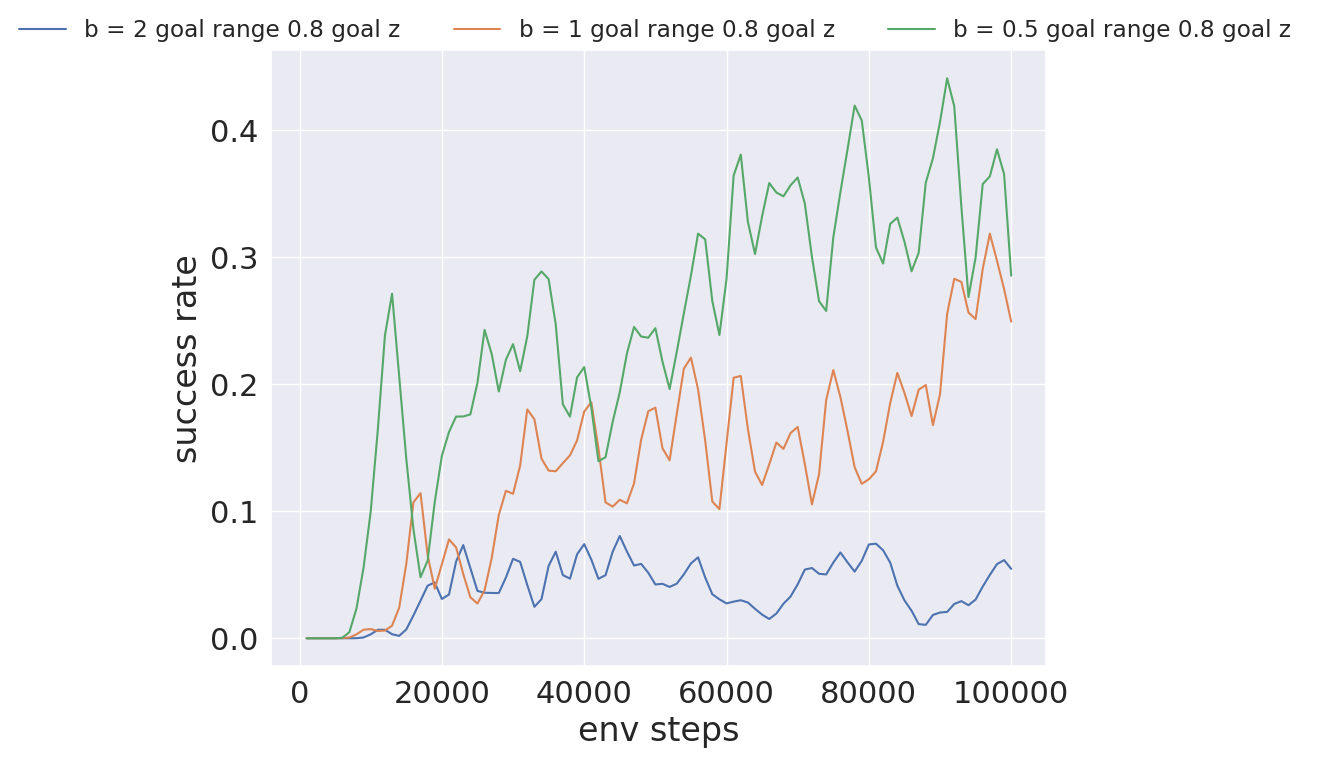

In [8]:
files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2 goal range 0.8 goal z " , filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))


files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1 goal range 0.8 goal z ", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 0.5 goal range 0.8 goal z ", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))


data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")



# Reach 0.005 change goal z distance_threshold_0_005 n_substeps=5

100
100
100


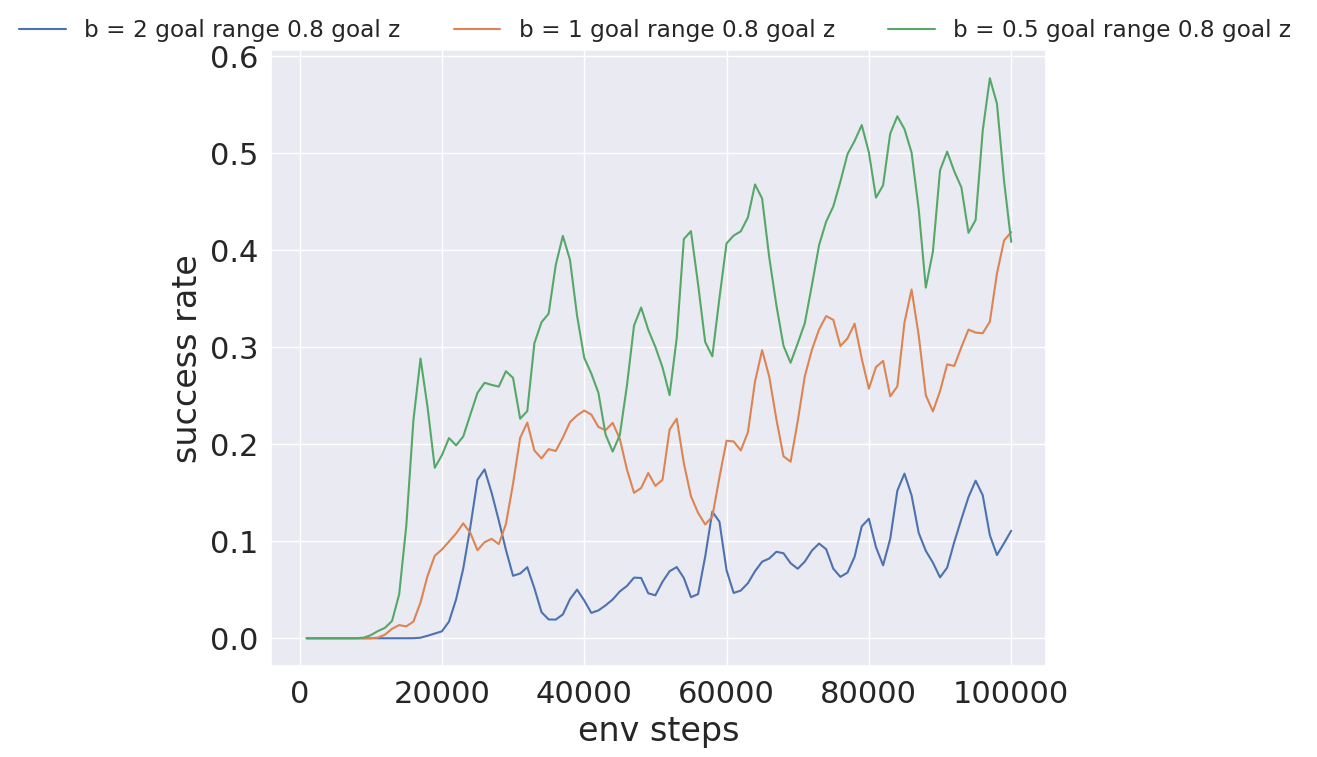

In [9]:
files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_5/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2 goal range 0.8 goal z n_substeps_5 " , filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))


files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_5/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1 goal range 0.8 goal z n_substeps_5 ", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_5/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 0.5 goal range 0.8 goal z n_substeps_5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))


data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")



# Reach 0.005 change goal z distance_threshold_0_005 n_substeps=10

100
100
100


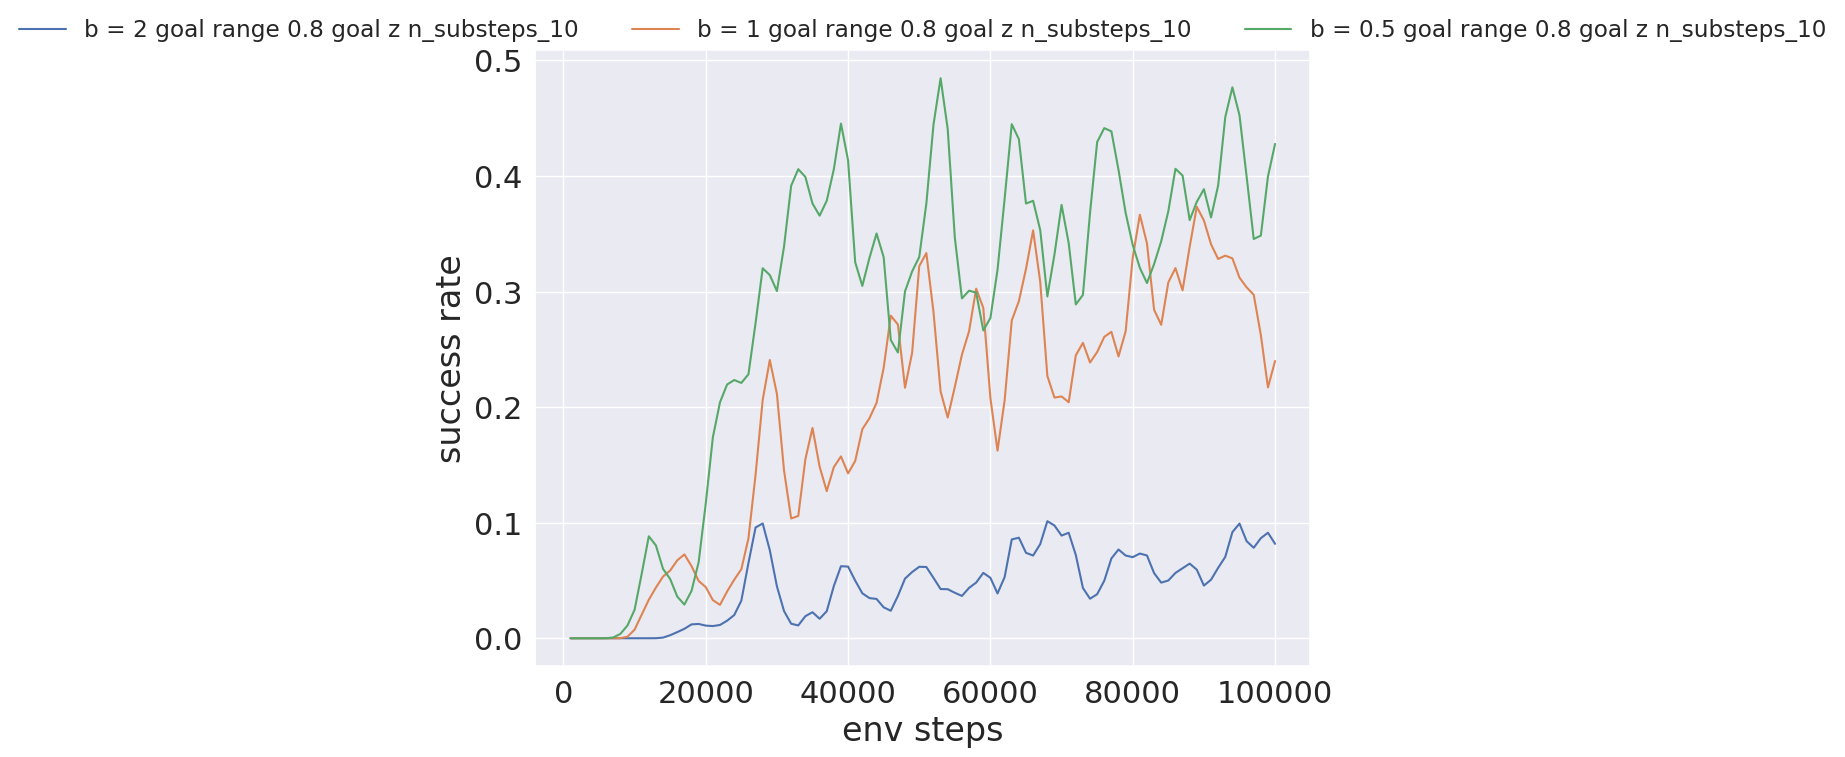

In [10]:
files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_10/her/b_2/sac_her_10hz_128_128_b_2_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_2_1e6 = pd.concat([load_data("b = 2 goal range 0.8 goal z n_substeps_10 " , filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_2_1e6))


files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_10/her/b_1/sac_her_10hz_128_128_b_1_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_1_1e6 = pd.concat([load_data("b = 1 goal range 0.8 goal z n_substeps_10 ", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_1_1e6))

files = [
    "D2D/panda_reach_dense/goal_range_08_step_80/distance_threshold_0_005/change_z_scope_n_substeps_10/her/b_05/sac_her_10hz_128_128_b_05_1e5steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_1e6 = pd.concat([load_data("b = 0.5 goal range 0.8 goal z n_substeps_10", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_1e6))


data_plot = pd.concat([
    df_reach_b_2_1e6,
    df_reach_b_1_1e6,
    df_reach_b_05_1e6,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")



# F2F

In [12]:

files = [
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_1_singleRL",
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_4_singleRL",
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_5_singleRL"
]
seed_strs = [
    "seed 1",
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_F2F_skip_3_1e6 = pd.concat([load_data("skip = 3", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_F2F_skip_3_1e6))

500


In [13]:

files = [
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_1_singleRL",
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_2_singleRL",
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_3_singleRL",
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_4_singleRL",
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_5_singleRL"
]
seed_strs = [
    "seed 1",
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_F2F_skip_5_1e6 = pd.concat([load_data("skip = 5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_F2F_skip_5_1e6))

500


In [14]:
files = [
    "D2D/VVC/relative_hard/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

500


In [13]:
first_files = [
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_1_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_2_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_3_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_4_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_5_singleRL",
]
second_files = [
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_reach_skip_3_2_skip_1 = pd.concat([load_two_stage_data("skip_3_2_skip_1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_skip_3_2_skip_1))

500


In [14]:
first_files = [
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_1_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_2_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_3_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_4_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_5_singleRL",
]
second_files = [
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_reach_skip_5_2_skip_1 = pd.concat([load_two_stage_data("skip_5_2_skip_1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_skip_5_2_skip_1))

500


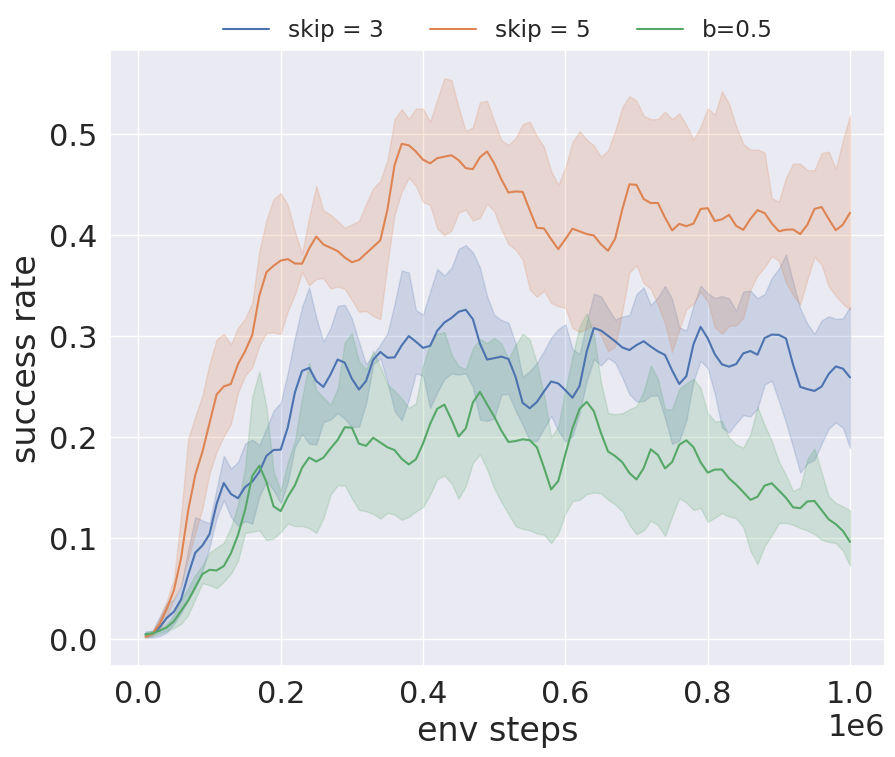

In [15]:
data_plot = pd.concat([
df_F2F_skip_3_1e6,
df_F2F_skip_5_1e6,
df_b_05,
# df_reach_skip_3_2_skip_1,
# df_reach_skip_5_2_skip_1
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

# f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate_relative_sac_one_stage.pdf", format="pdf", bbox_inches="tight")

## One Stage 
### relative_hard

In [6]:
files = [
    "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    "seed 2", 
     "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_b_0125 = pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))

500


In [7]:
files = [
    "D2D/sac_her_10hz_128_128_b_025_1e6steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_025_1e6steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_025_1e6steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_025_1e6steps_seed_5_singleRL"
]
seed_strs = [
    "seed 1",
    "seed 2", 
     "seed 3", 
    "seed 4", 
   "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_b_025 = pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))

500


In [8]:
files = [
    "D2D/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05 = pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))

500


In [9]:
files = [
    "D2D/sac_her_10hz_128_128_b_1_1e6steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_1_1e6steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_1_1e6steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_1_1e6steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_1_1e6steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1 = pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))

500


In [10]:
files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))

201


In [11]:
files = [
   "D2D/sac_her_10hz_128_128_b_4_1e6steps_seed_1_singleRL",
   "D2D/sac_her_10hz_128_128_b_4_1e6steps_seed_2_singleRL",
   "D2D/sac_her_10hz_128_128_b_4_1e6steps_seed_3_singleRL",
   "D2D/sac_her_10hz_128_128_b_4_1e6steps_seed_4_singleRL",
   "D2D/sac_her_10hz_128_128_b_4_1e6steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_4 = pd.concat([load_data("b=4", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_4))

500


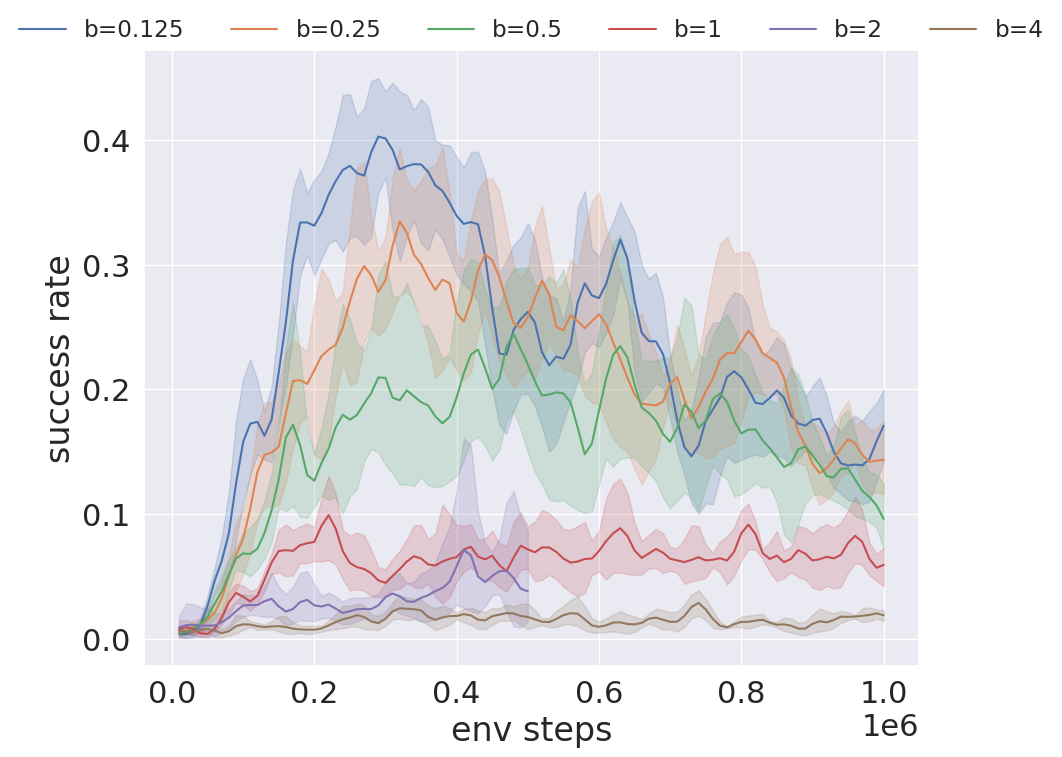

In [12]:
data_plot = pd.concat([
    df_b_0125,
    df_b_025,
    df_b_05,
    df_b_1,
    df_b_2,
    df_b_4,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

# f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate_relative_sac_one_stage.pdf", format="pdf", bbox_inches="tight")

# relative_sac  D2D

## relative D2D 0.125 

In [13]:
files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2_5e5 = pd.concat([load_data("b=2 5e5", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2_5e5))

201


In [14]:
first_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_relative_b_2_b_0125 = pd.concat([load_two_stage_data("b=2 + b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_relative_b_2_b_0125))

451


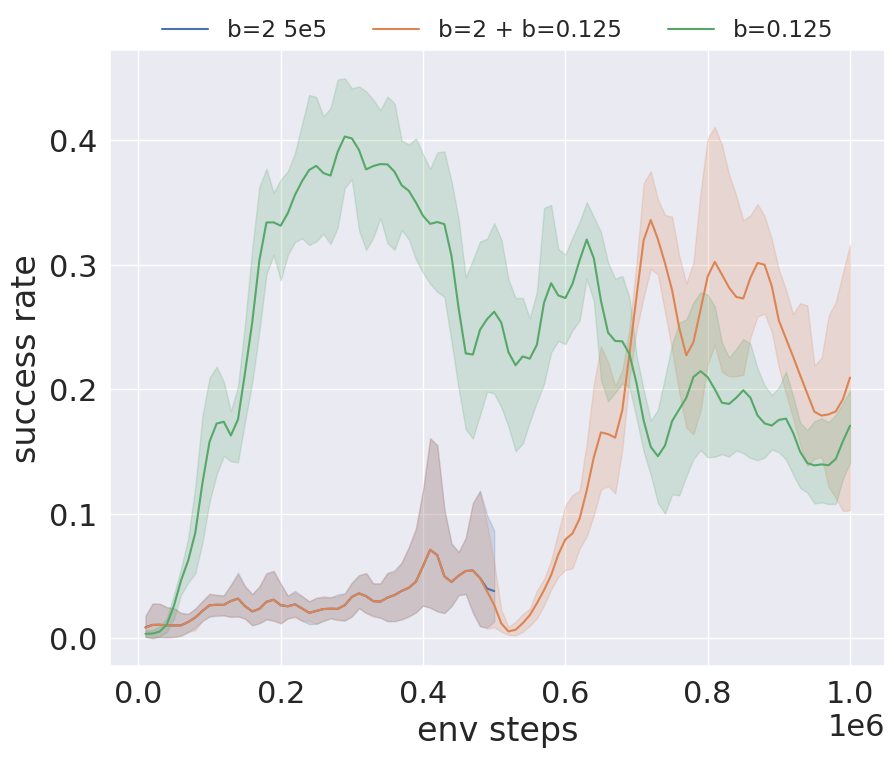

In [15]:
data_plot = pd.concat([
    df_b_2_5e5,
    df_relative_b_2_b_0125,
    df_b_0125,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

## relative b=2 --> b=0.25

In [16]:
first_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_relative_b_2_b_025 = pd.concat([load_two_stage_data("b=2 + b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_relative_b_2_b_025))

451


## relative_sac  D2S 

In [17]:
first_files =[
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_seed_1_singleRL",
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_seed_2_singleRL",
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_seed_3_singleRL",
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_seed_4_singleRL",
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_seed_5_singleRL",

]

second_files =[
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_sparse_5e5steps_seed_1_singleRL", 
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_sparse_5e5steps_seed_2_singleRL", 
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_sparse_5e5steps_seed_3_singleRL", 
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_sparse_5e5steps_seed_4_singleRL", 
    "D2D/D2S/sac_her_10hz_128_128_b_025_5e5steps_sparse_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025_sparse = pd.concat([load_two_stage_data("b=0.25 + sparse",  first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_025_sparse))

500


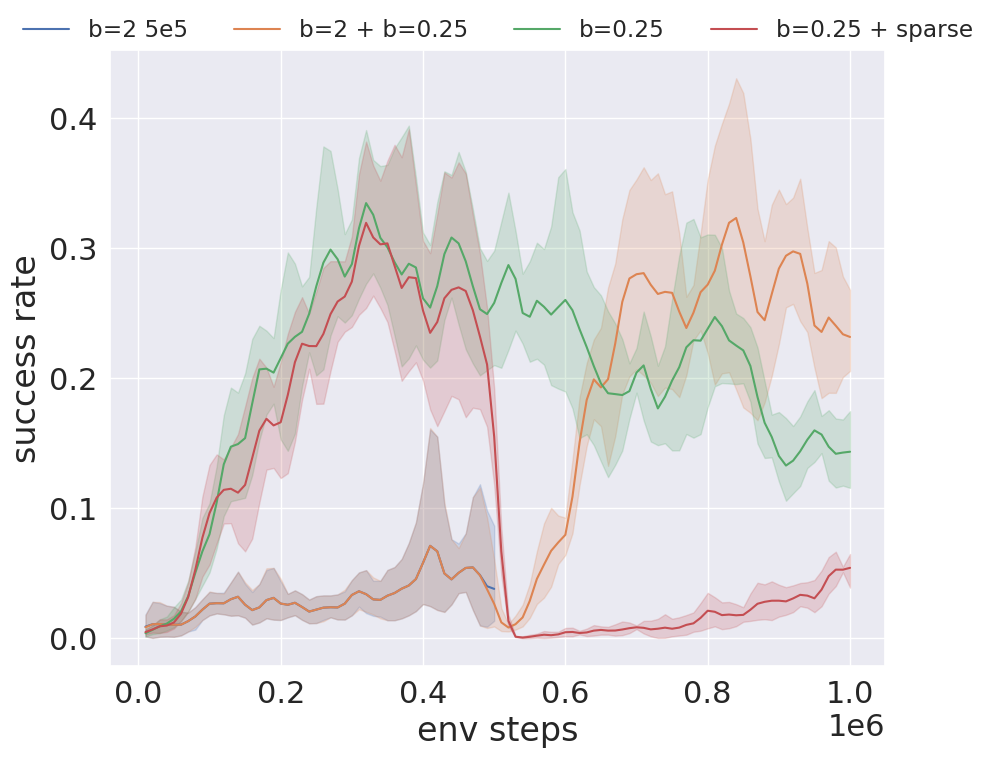

In [18]:
data_plot = pd.concat([
    df_b_2_5e5,
    df_relative_b_2_b_025,
    df_b_025,
    df_b_025_sparse
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

## relative b=2 --> b=0.5

In [19]:
first_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_relative_b_2_b_05 = pd.concat([load_two_stage_data("b=2 + b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_relative_b_2_b_05))

451


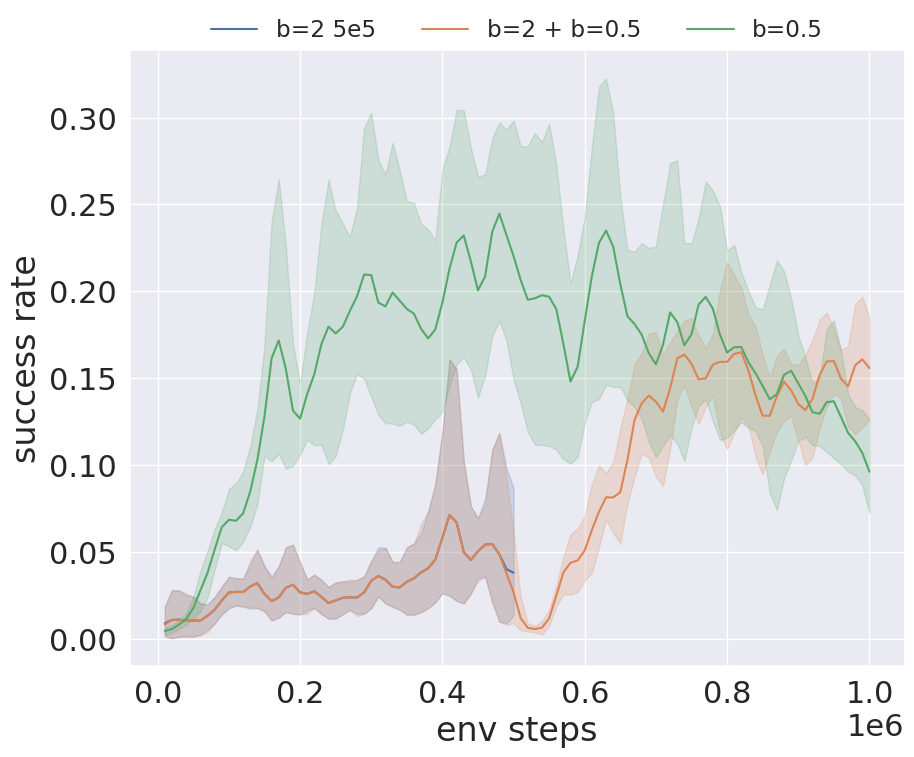

In [48]:
data_plot = pd.concat([
    df_b_2_5e5,
    df_relative_b_2_b_05,
    df_b_05,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

## relative hard b = 2 --> b = 0.5 --> b = 0.25 

In [21]:
first_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL", 
]

third_files = [
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5_bsteps_b_025_5e5_bsteps_seed_1_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5_bsteps_b_025_5e5_bsteps_seed_2_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5_bsteps_b_025_5e5_bsteps_seed_3_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5_bsteps_b_025_5e5_bsteps_seed_4_singleRL", 
    "D2D/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5_bsteps_b_025_5e5_bsteps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_relative_b_2_b_05_b_025 = pd.concat([load_three_stage_data("b=2 + b=0.5 + b =0.25", first_filename,second_filename,third_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,third_filename,seed_str in zip(first_files, second_files,third_files, seed_strs)])
print(len(df_relative_b_2_b_05_b_025))

701


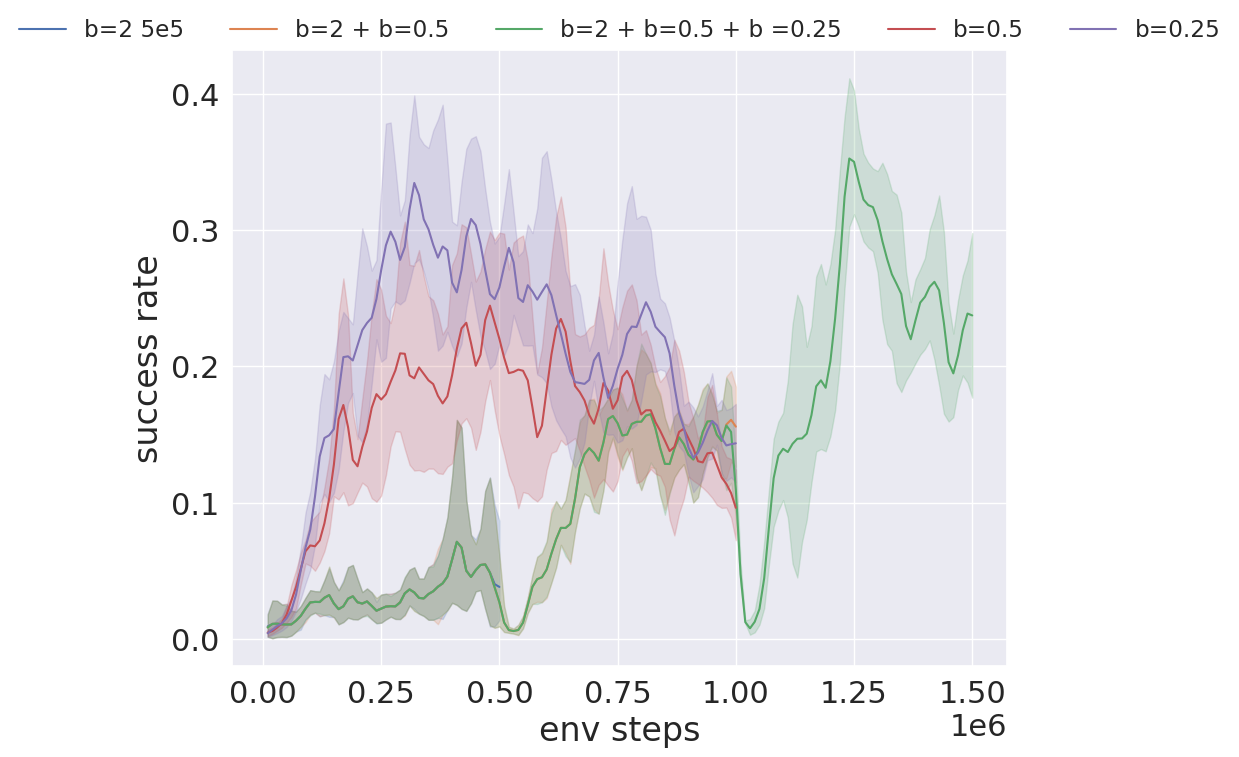

In [22]:
data_plot = pd.concat([
    df_b_2_5e5,
    df_relative_b_2_b_05,
    df_relative_b_2_b_05_b_025,
    df_b_05,
    df_b_025
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

## relative_sac  D2D change_replay_buffer_size 

In [23]:
first_files = [
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL_buffersize_1e5",
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL_buffersize_1e5",
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL_buffersize_1e5",
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL_buffersize_1e5",
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL_buffersize_1e5",
]
second_files = [
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL_buffersize_1e5", 
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL_buffersize_1e5", 
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL_buffersize_1e5", 
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL_buffersize_1e5", 
    "D2D/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL_buffersize_1e5", 
]

seed_strs = [
    "seed 1", 
   "seed 2", 
    "seed 3", 
   "seed 4", 
    "seed 5"
]
df_b_2_b_025_buffer_size1e5 = pd.concat([load_two_stage_data("b=2 +b=0.25 buffer_size=1e5",first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_2_b_025_buffer_size1e5))

500


In [24]:
first_files = [
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL_buffersize_4e5",
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL_buffersize_4e5",
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL_buffersize_4e5",
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL_buffersize_4e5",
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL_buffersize_4e5",
]
second_files = [
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL_buffersize_4e5", 
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL_buffersize_4e5", 
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL_buffersize_4e5", 
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL_buffersize_4e5", 
    "D2D/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL_buffersize_4e5", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
   "seed 4", 
    "seed 5"
]

df_b_2_b_025_buffer_size4e5 = pd.concat([load_two_stage_data("b=2 +b=0.25 buffer_size=4e5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_2_b_025_buffer_size4e5))

500


## relative_sac  E2D 

In [25]:
files = [
   "D2D/from_demos/random_select/sac_her_medium2_10hz_128_128_b_025_5e5steps_seed_1_singleRL", 
   "D2D/from_demos/random_select/sac_her_medium2_10hz_128_128_b_025_5e5steps_seed_2_singleRL", 
    "D2D/from_demos/random_select/sac_her_medium2_10hz_128_128_b_025_5e5steps_seed_3_singleRL", 
    "D2D/from_demos/random_select/sac_her_medium2_10hz_128_128_b_025_5e5steps_seed_4_singleRL", 
    "D2D/from_demos/random_select/sac_her_medium2_10hz_128_128_b_025_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E_to_b_025_random_select = pd.concat([load_data("b=E to b=0.25 random_select", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E_to_b_025_random_select))

250


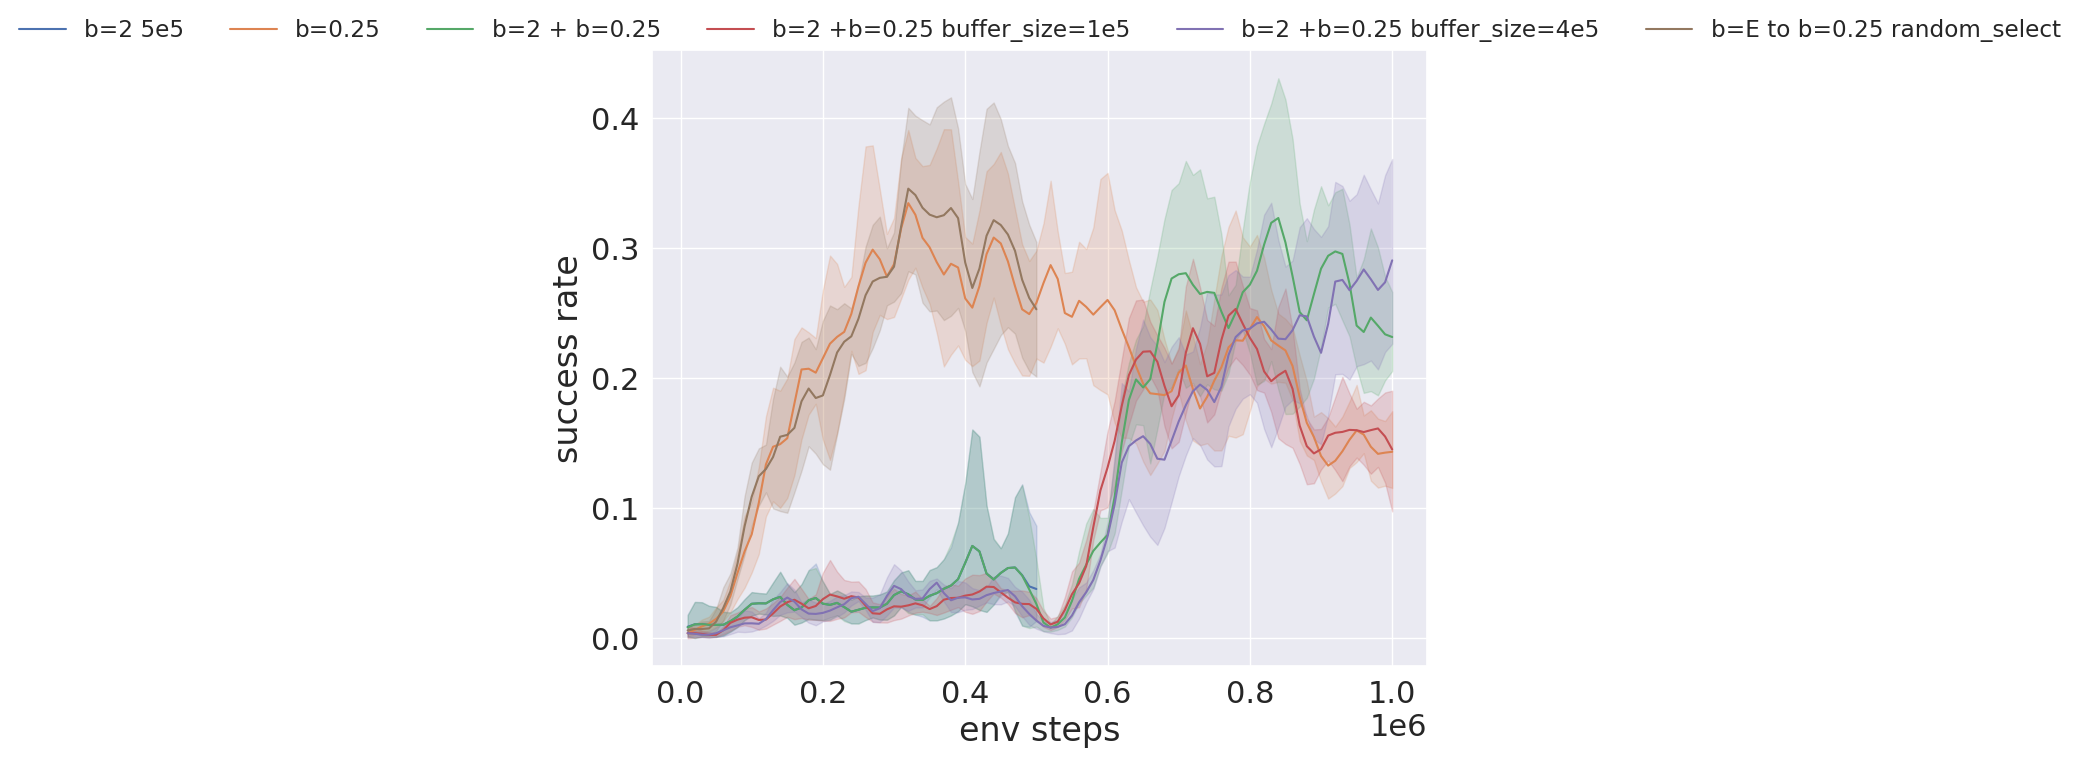

In [49]:
data_plot = pd.concat([
    df_b_2_5e5,
    df_b_025,
    df_relative_b_2_b_025,
    df_b_2_b_025_buffer_size1e5,
    df_b_2_b_025_buffer_size4e5,
    df_E_to_b_025_random_select
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# hard_sac D2D

## One_stage

In [27]:
files = [
   "D2D/hard_sac1e6/b_0125/sac_her_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/b_0125/sac_her_10hz_128_128_b_0125_1e6steps_seed_2_singleRL", 
   "D2D/hard_sac1e6/b_0125/sac_her_10hz_128_128_b_0125_1e6steps_seed_3_singleRL", 
   "D2D/hard_sac1e6/b_0125/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
   "D2D/hard_sac1e6/b_0125/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_0125 = pd.concat([load_data("b=0125 hard 1e6", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_0125))

500


In [28]:
files = [
   "D2D/hard_sac1e6/b_025/sac_her_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/b_025/sac_her_10hz_128_128_b_025_1e6steps_seed_2_singleRL", 
   "D2D/hard_sac1e6/b_025/sac_her_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
   "D2D/hard_sac1e6/b_025/sac_her_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
   "D2D/hard_sac1e6/b_025/sac_her_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_025 = pd.concat([load_data("b=025 hard 1e6", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_025))

500


In [29]:
files = [
   "D2D/hard_sac1e6/b_05/sac_her_hard_10hz_128_128_1e6steps_loss_1_singleRL", 
   "D2D/hard_sac1e6/b_05/sac_her_hard_10hz_128_128_1e6steps_loss_2_singleRL", 
    "D2D/hard_sac1e6/b_05/sac_her_hard_10hz_128_128_1e6steps_loss_3_singleRL", 
    "D2D/hard_sac1e6/b_05/sac_her_hard_10hz_128_128_1e6steps_loss_4_singleRL", 
    "D2D/hard_sac1e6/b_05/sac_her_hard_10hz_128_128_1e6steps_loss_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_05 = pd.concat([load_data("b=05 hard 1e6", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_05))

500


In [30]:
files = [
   "D2D/hard_sac1e6/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
   "D2D/hard_sac1e6/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
   "D2D/hard_sac1e6/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_1 = pd.concat([load_data("b=1 hard 1e6", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_1))

500


In [31]:
files = [
   "D2D/hard_sac1e6/b_2/sac_her_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/b_2/sac_her_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/b_2/sac_her_10hz_128_128_b_2_1e6steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/b_2/sac_her_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/b_2/sac_her_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2 = pd.concat([load_data("b=2 hard 1e6", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_2))

500


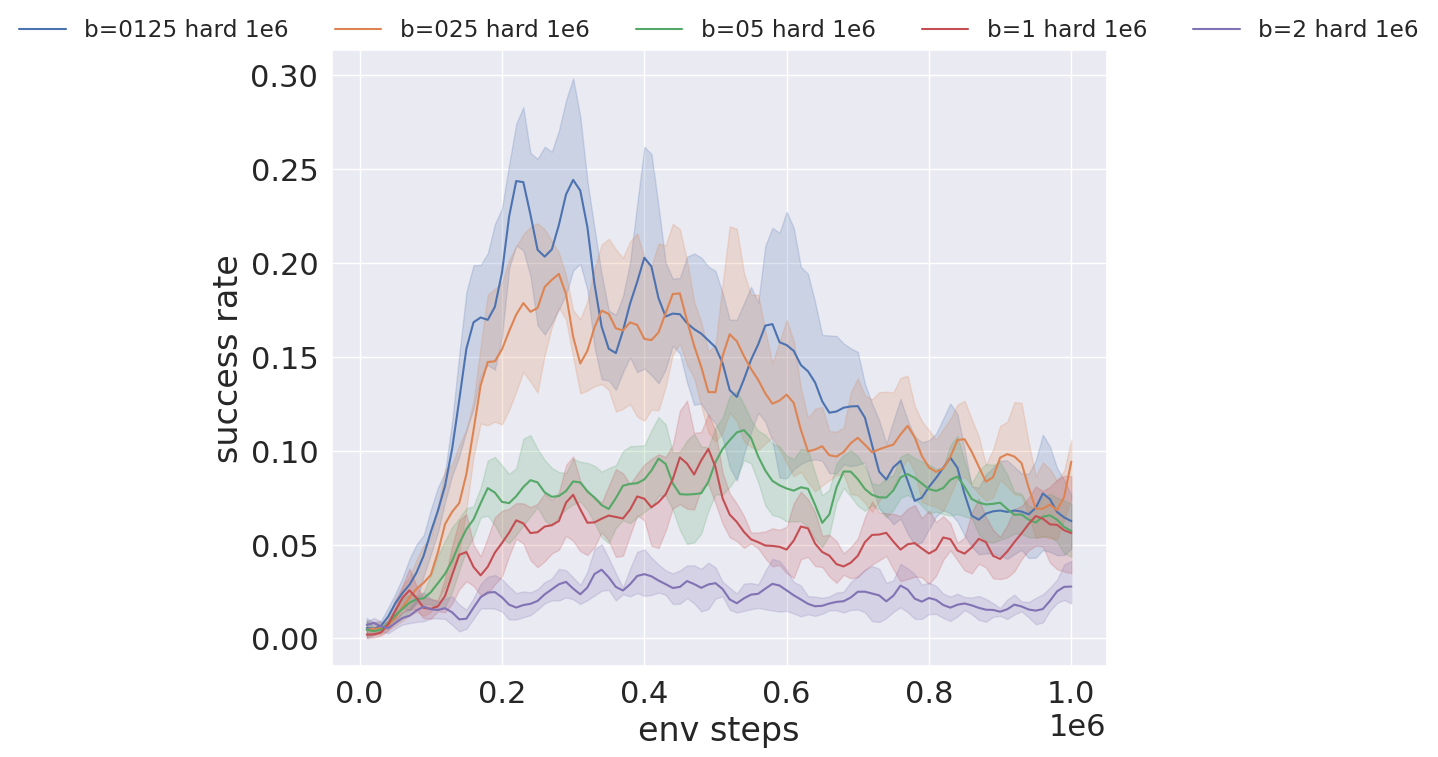

In [32]:
data_plot = pd.concat([
    df_hard_b_0125,
    df_hard_b_025,
    df_hard_b_05,
    df_hard_b_1,
    df_hard_b_2,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

# f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate_relative_sac_one_stage.pdf", format="pdf", bbox_inches="tight")

## D2D 2-->0.5

In [33]:
files = [
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_5e5_first = pd.concat([load_data("b=2 5e5 hard_first", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_hard_b_2_5e5_first))

250


In [34]:
first_files = [
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
second_files = [
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_b05 = pd.concat([load_two_stage_data("hard b=2 to b=05", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_hard_b_2_b05))

500


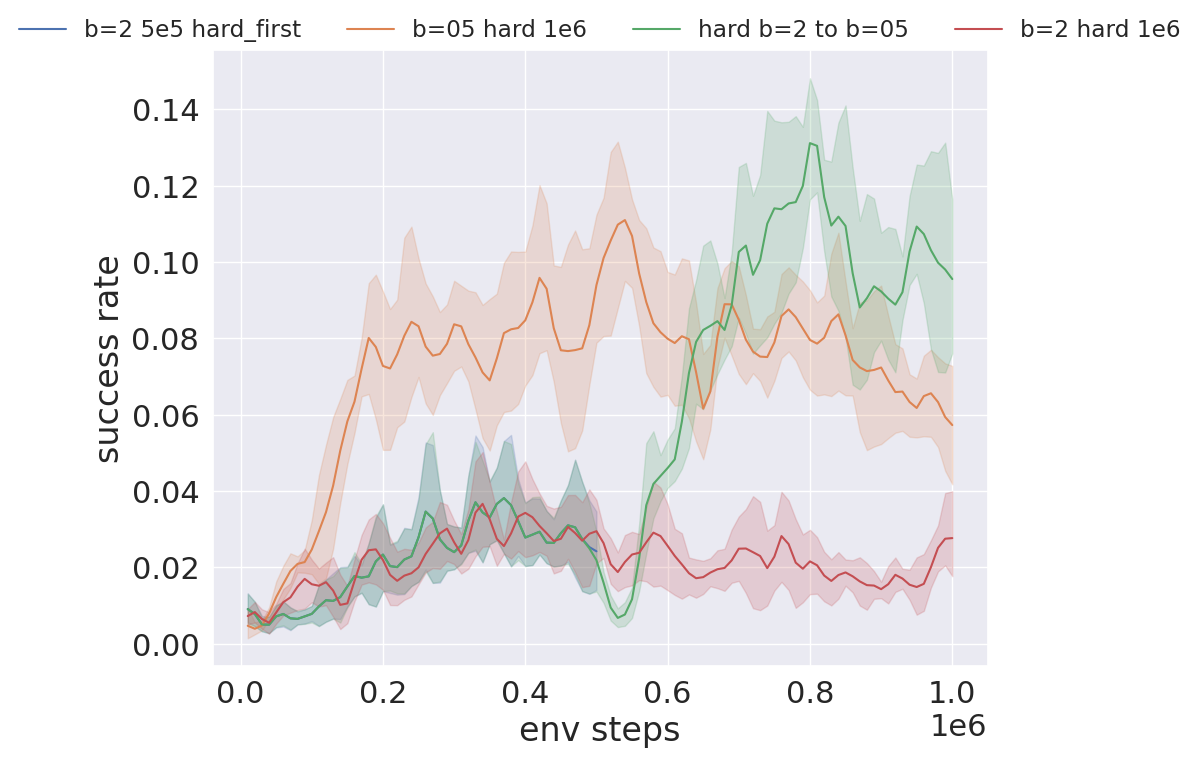

In [35]:
data_plot = pd.concat([
    df_hard_b_2_5e5_first,
    df_hard_b_05,
    df_hard_b_2_b05,
    df_hard_b_2,
   
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]

# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

#f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")

## hard b=2-->b=0.25

In [36]:
first_files = [
   "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
second_files = [
    "D2D/hard_sac1e6/two_stage_hard_b2_b025/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b025/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b025/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b025/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b025/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_b_025 = pd.concat([load_two_stage_data("b=2 to b=025 hard", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_hard_b_2_b_025))

500


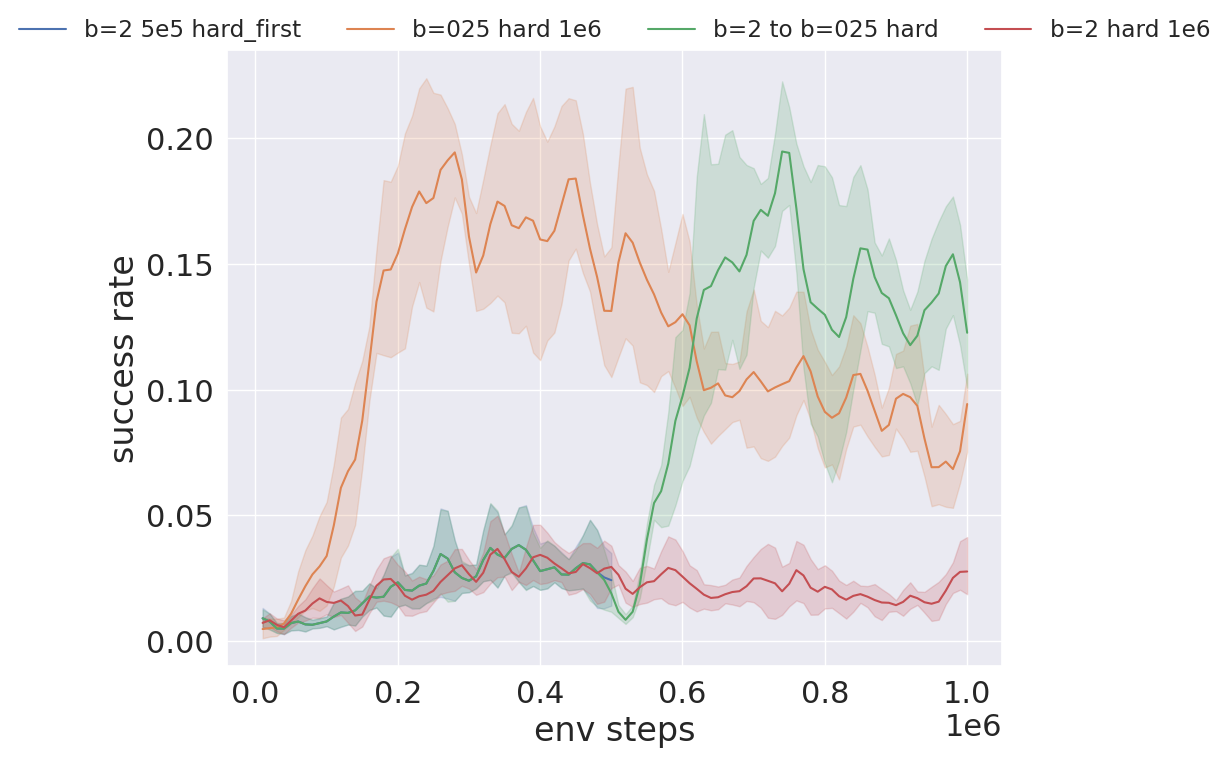

In [37]:
data_plot = pd.concat([
    df_hard_b_2_5e5_first,
    df_hard_b_025,
    df_hard_b_2_b_025,
    df_hard_b_2,
   
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]

# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

#f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")

In [38]:
first_files = [
   "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL_buffersize_4e5", 
   "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL_buffersize_4e5", 
]
second_files = [
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL_buffersize_4e5", 
    "D2D/hard_sac1e6/buffer_size4e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL_buffersize_4e5", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_b_025_buffersize_4e5 = pd.concat([load_two_stage_data("b=2 to b=025 buffersize_4e5 hard", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_hard_b_2_b_025_buffersize_4e5))

500


In [39]:
first_files = [
   "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL_buffersize_1e5", 
   "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL_buffersize_1e5", 
]
second_files = [
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL_buffersize_1e5", 
    "D2D/hard_sac1e6/buffer_size1e5/sac_her_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL_buffersize_1e5", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_b_025_buffersize_1e5 = pd.concat([load_two_stage_data("hard b=2 to b=025 buffersize_1e5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_hard_b_2_b_025_buffersize_1e5))

500


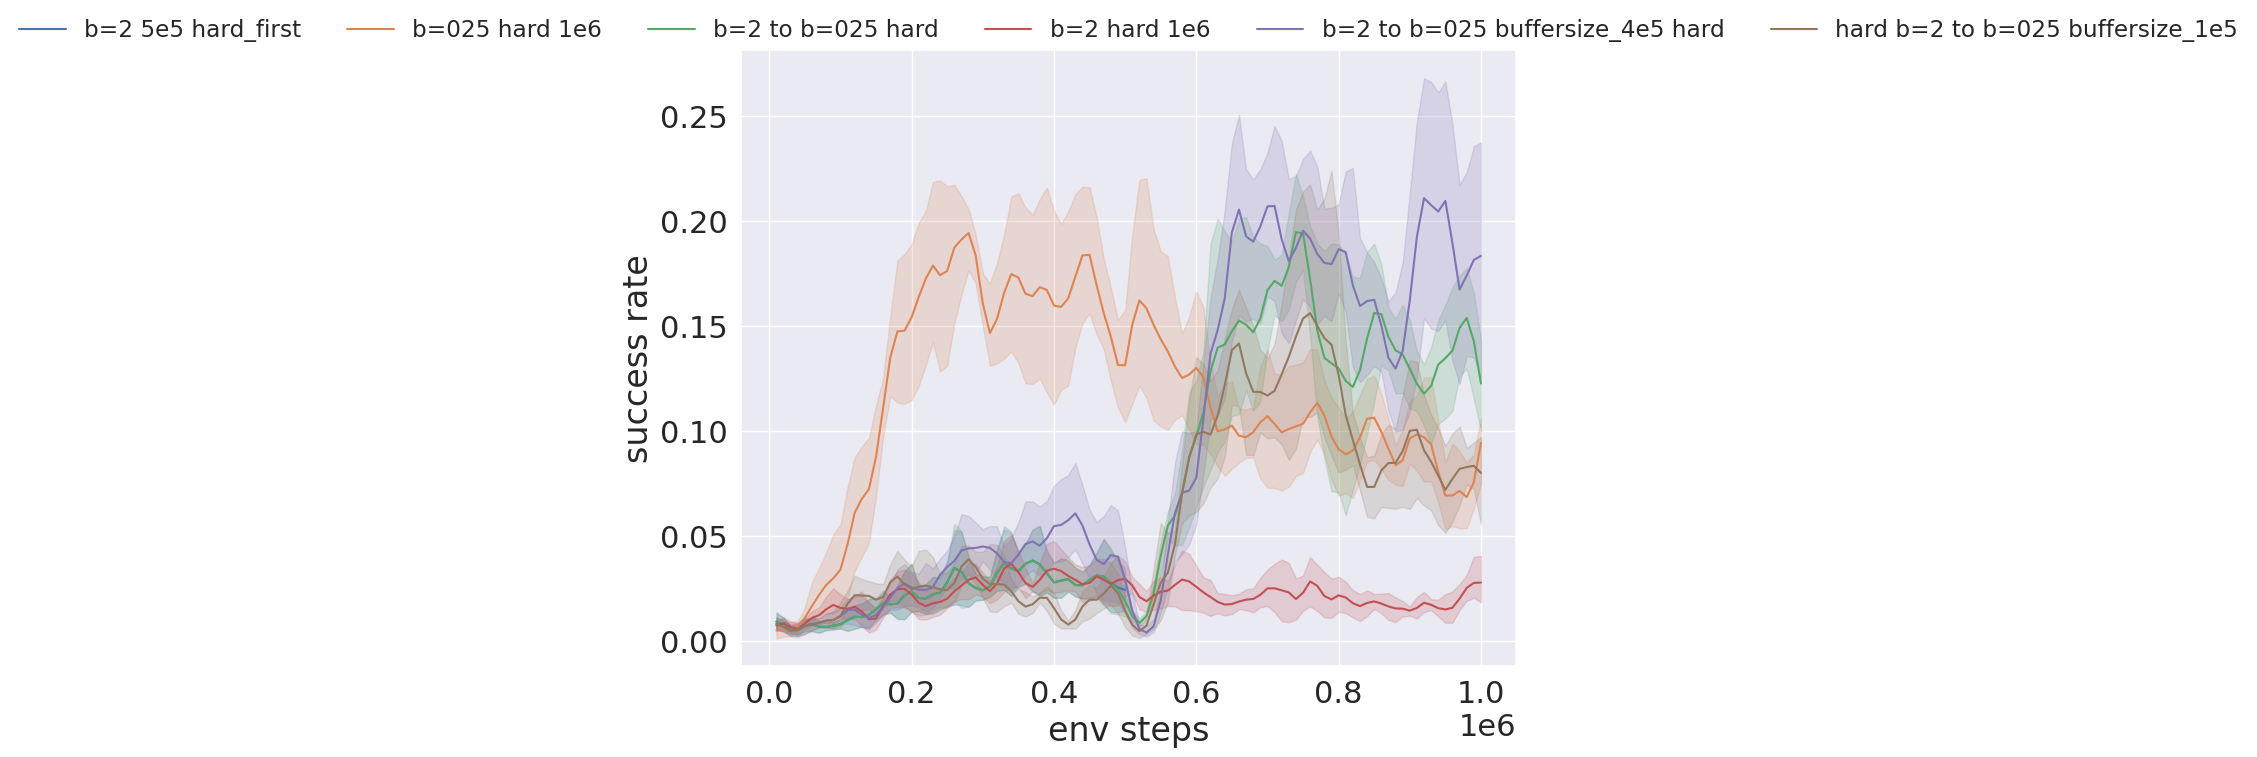

In [40]:
data_plot = pd.concat([
    df_hard_b_2_5e5_first,
    df_hard_b_025,
    df_hard_b_2_b_025,
    df_hard_b_2,
    df_hard_b_2_b_025_buffersize_4e5,
    df_hard_b_2_b_025_buffersize_1e5 
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]

# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

#f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")

# D2D  b=2-->b=0.125

In [41]:
first_files = [
   "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
   "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b05/sac_her_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
second_files = [
    "D2D/hard_sac1e6/two_stage_hard_b2_b0125/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b0125/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b0125/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b0125/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/hard_sac1e6/two_stage_hard_b2_b0125/sac_her_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_hard_b_2_b_0125 = pd.concat([load_two_stage_data("hard b=2 to b=0125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_hard_b_2_b_0125))

500


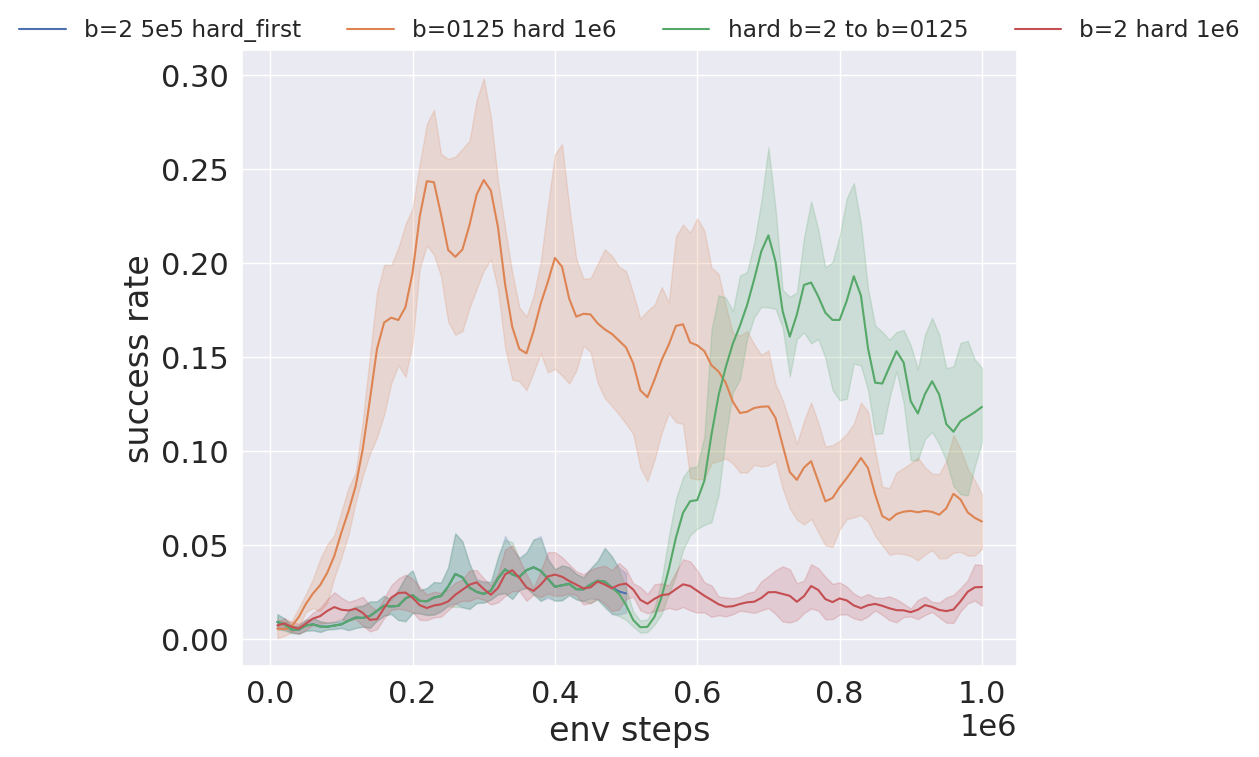

In [42]:
data_plot = pd.concat([
    df_hard_b_2_5e5_first,
    df_hard_b_0125,
    df_hard_b_2_b_0125,
    df_hard_b_2,
   
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]

# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

#f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")

## E2D hard sac

In [43]:
files = [
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_025_5e5steps_seed_1_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_025_5e5steps_seed_2_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_025_5e5steps_seed_3_singleRL", 
    "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_025_5e5steps_seed_4_singleRL", 
    "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_025_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
   "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E_to_b_025_random_select_hard = pd.concat([load_data("E to b=0.25 random_select_hard", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E_to_b_025_random_select_hard))

250


In [44]:
files = [
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_05_5e5steps_seed_1_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_05_5e5steps_seed_2_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_05_5e5steps_seed_3_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_05_5e5steps_seed_4_singleRL", 
   "D2D/from_demos/random_select_E2D_hard/sac_her_hard_10hz_128_128_b_05_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E_to_b_05_random_select_hard = pd.concat([load_data("E to b=0.5 random_select_hard", filename, seed_str, insert_no=14, algo_dir="rl_single", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E_to_b_05_random_select_hard))

250


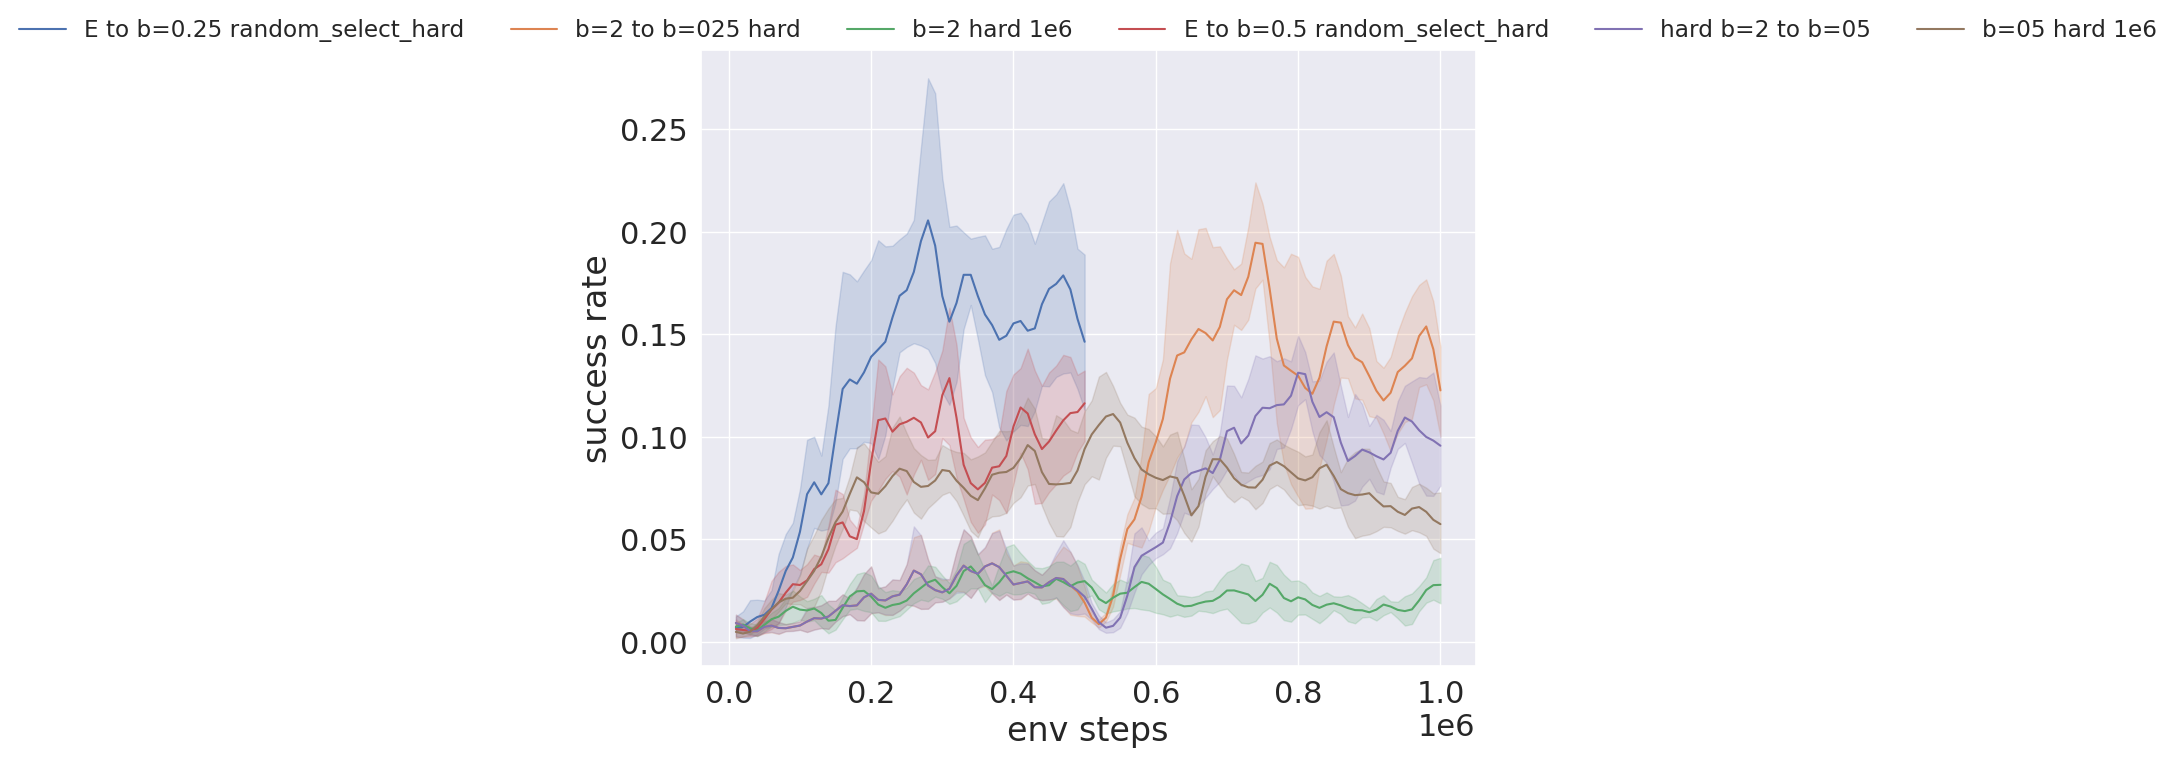

In [45]:
data_plot = pd.concat([
    df_E_to_b_025_random_select_hard,
    df_hard_b_2_b_025,
    df_hard_b_2,
    df_E_to_b_05_random_select_hard,
    df_hard_b_2_b05,
    df_hard_b_05
   
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]

# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")
#sns.move_legend(ax, loc="upper right", title=None)

#f.savefig("flycraft_vs_pyfly_SAC_in_rl_success_rate.pdf", format="pdf", bbox_inches="tight")